In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV and check data type and Null data

In [2]:
booking=pd.read_csv("hotel_bookings.csv")
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [25]:
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Stats

In [3]:
booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Proportions

In [4]:
booking['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [5]:
booking['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [6]:
booking['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [7]:
booking['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
SDN        1
BWA        1
GUY        1
UMI        1
HND        1
Name: country, Length: 177, dtype: int64

In [8]:
booking['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [9]:
booking['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

### Covariance and Correlation

In [10]:
# Covariance
print('Covariance:')
booking.cov()

Covariance:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,0.233210,15.126964,0.005692,0.053534,-0.025994,-0.000864,0.022822,0.016789,0.000972,-0.001529,-0.007197,0.044906,-0.041478,-0.045481,-4.490794,-1.033208,0.460407,1.160602,-0.023158,-0.089840
lead_time,15.126964,11419.721511,3.034866,184.455853,2.127750,9.142389,33.810687,7.398401,-1.602367,-0.217774,-2.336794,7.763414,-11.769232,0.010375,-831.818443,1662.193716,319.796767,-340.640932,-3.052469,-8.108810
arrival_date_year,0.005692,3.034866,0.500522,-5.203069,-0.001373,0.015188,0.041694,0.012145,0.015402,-0.000909,0.001286,-0.071575,0.030954,0.014247,4.964410,24.361820,-0.703261,7.064052,-0.002375,0.060874
arrival_date_week_number,0.053534,184.455853,-5.203069,185.099790,7.981327,0.247374,0.403932,0.204187,0.029924,0.013781,-0.072053,0.407810,-0.425865,0.048877,-45.917933,-157.348199,5.489676,52.109585,0.006409,0.282050
arrival_date_day_of_month,-0.025994,2.127750,-0.001373,7.981327,77.102966,-0.143405,-0.472085,-0.007965,0.050899,-0.000197,-0.009484,-0.200257,-0.003942,0.060788,1.448817,50.497157,3.511319,13.421189,0.018703,0.021317
stays_in_weekend_nights,-0.000864,9.142389,0.015188,0.247374,-0.143405,0.997229,0.950855,0.053144,0.018226,0.001798,-0.015313,-0.010771,-0.063875,0.041222,15.651660,7.052193,-0.951453,2.490075,-0.004545,0.057533
stays_in_week_nights,0.022822,33.810687,0.041694,0.403932,-0.472085,0.950855,3.641554,0.102775,0.033619,0.003754,-0.032617,-0.022545,-0.139284,0.119760,38.502691,40.709348,-0.067817,6.291289,-0.011636,0.103166
adults,0.016789,7.398401,0.012145,0.204187,-0.007965,0.053144,0.102775,0.335543,0.007029,0.001024,-0.014908,-0.003296,-0.093665,-0.019525,-1.936162,13.385137,-0.084423,6.751655,0.002101,0.056433
children,0.000972,-1.602367,0.015402,0.029924,0.050899,0.018226,0.033619,0.007029,0.158851,0.000933,-0.002302,-0.008322,-0.012577,0.012726,1.873407,0.642877,-0.233331,6.542931,0.005500,0.025830
babies,-0.001529,-0.217774,-0.000909,0.013781,-0.000197,0.001798,0.003754,0.001024,0.000933,0.009494,-0.000153,-0.000617,-0.000956,0.005303,0.388872,0.129959,-0.018207,0.143711,0.000893,0.007562


In [11]:
# Correlation
print('Correlation:')
booking.corr()

Correlation:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


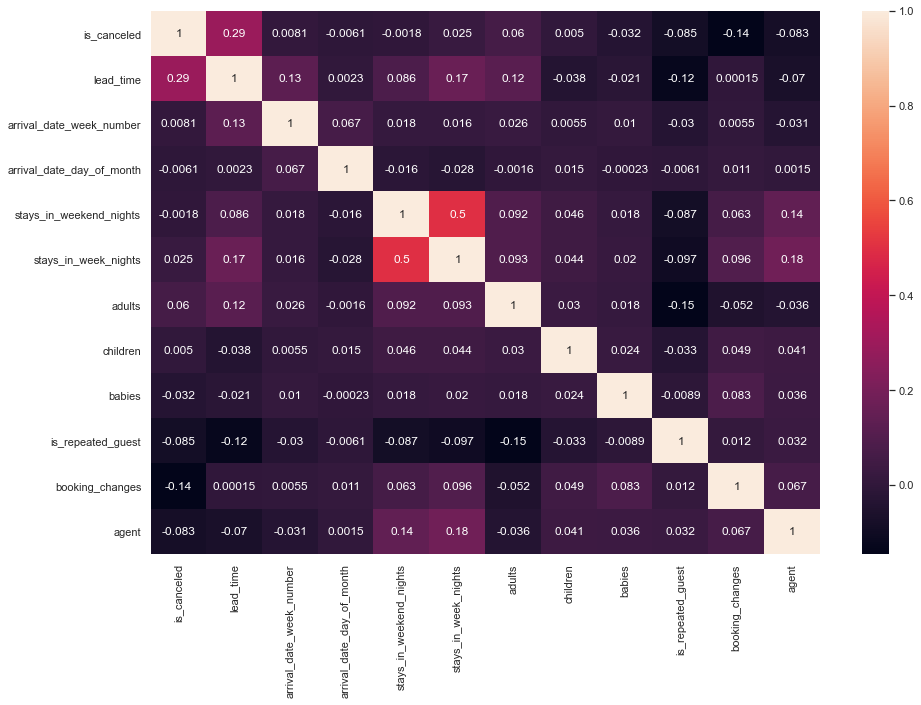

In [23]:
heatmap=booking[['is_canceled','lead_time','arrival_date_week_number','arrival_date_day_of_month',
                   'stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest',
                    'booking_changes','agent'
                   ]].corr(method='pearson')
cols=['is_canceled','lead_time','arrival_date_week_number','arrival_date_day_of_month',
                   'stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest',
                    'booking_changes','agent']
axis=sns.heatmap(heatmap, annot=True, xticklabels=cols, yticklabels=cols)
sns.set(rc = {'figure.figsize':(15,10)})

## Graphical Explanations

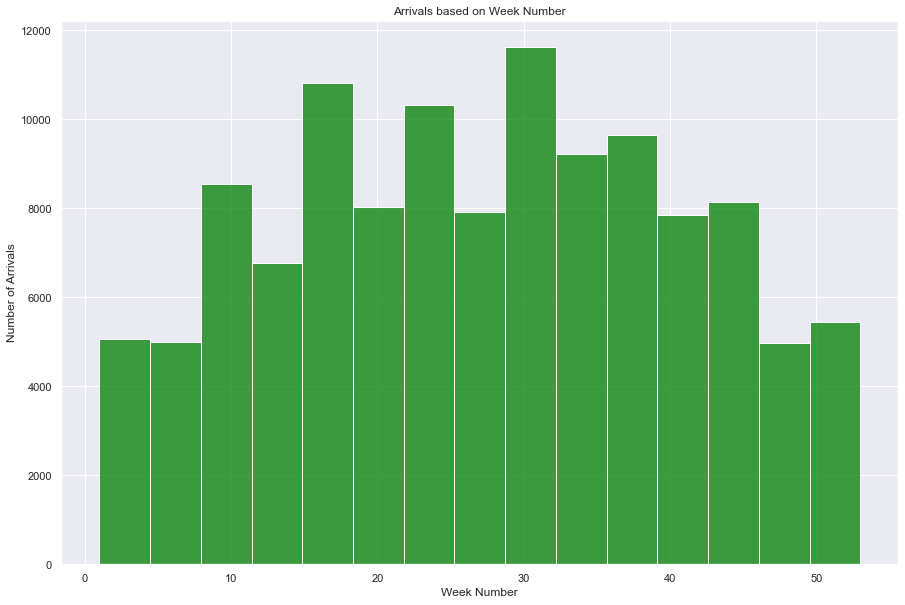

In [13]:
sns.histplot(x=booking['arrival_date_week_number'].values, data=booking, color='green', bins=15)
plt.title('Arrivals based on Week Number')
plt.xlabel('Week Number')
plt.ylabel('Number of Arrivals')
plt.show()
#Showing what time of year has the most bookings

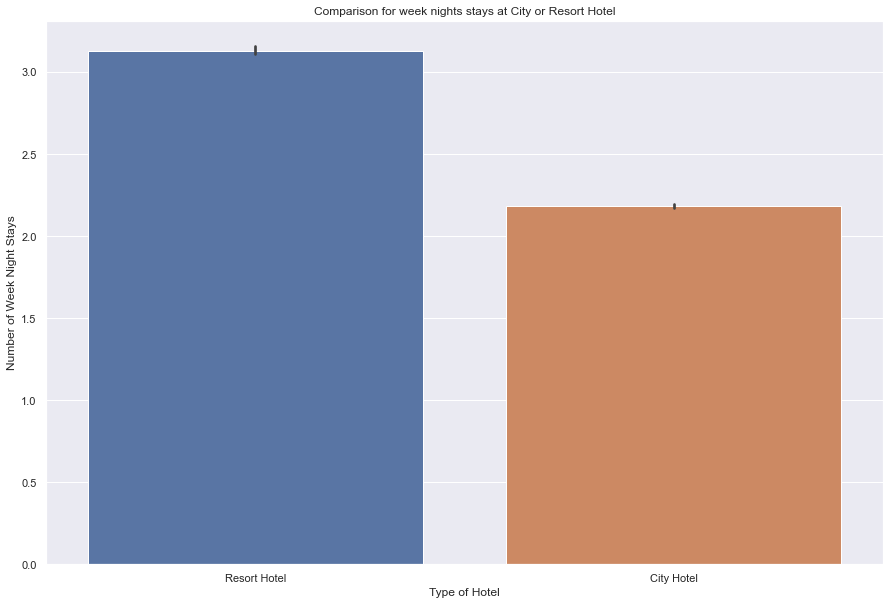

In [14]:
bar= sns.barplot(x='hotel', y='stays_in_week_nights',data=booking)
plt.title('Comparison for week nights stays at City or Resort Hotel')
plt.xlabel('Type of Hotel')
plt.ylabel('Number of Week Night Stays')
plt.show()
# To see which type of hotel gets more traffic during weeks

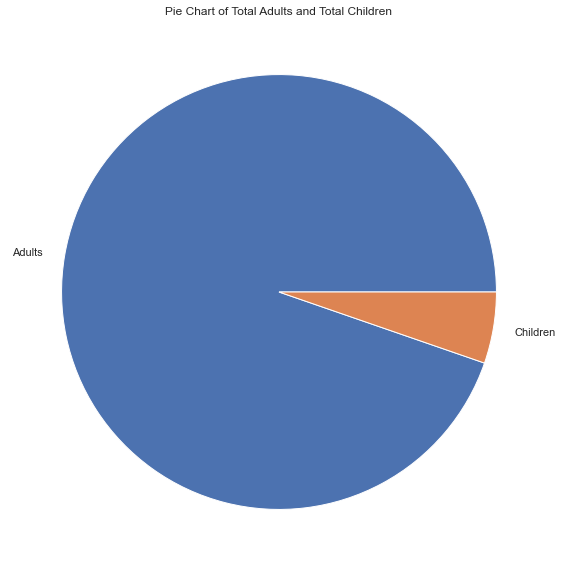

In [15]:
df=booking[['adults','children']].copy()
mylabels=['Adults','Children']
df = df.melt(var_name='source')
plt.pie(df.groupby('source')['value'].sum(), labels=mylabels)
plt.title('Pie Chart of Total Adults and Total Children')
plt.show()
#Show the number of adults in hotels compared to Children

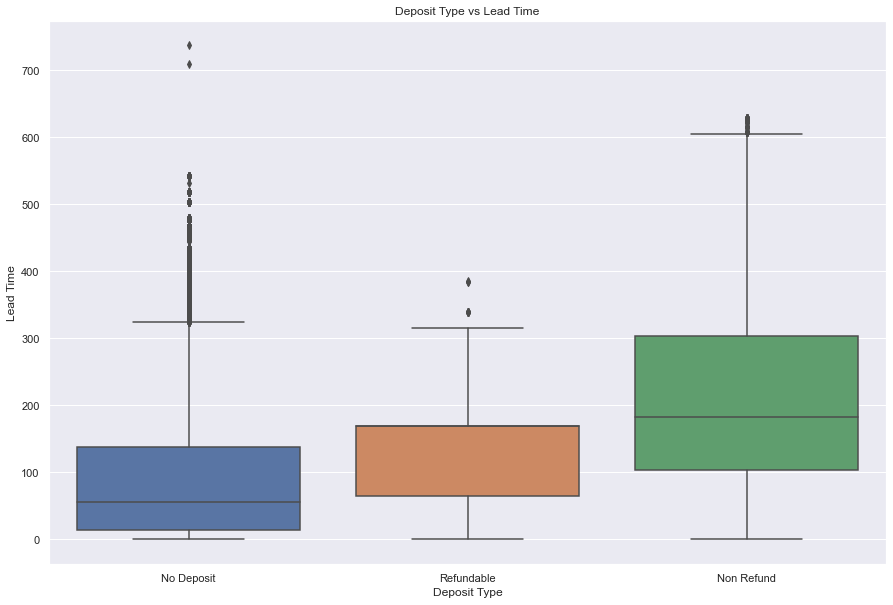

In [16]:
box_plot=sns.boxplot(x='deposit_type', y='lead_time', data=booking)
plt.title('Deposit Type vs Lead Time')
plt.xlabel('Deposit Type')
plt.ylabel('Lead Time')
plt.show()
#Is it more likely someone who spends longer looking for hotels pays differnetly

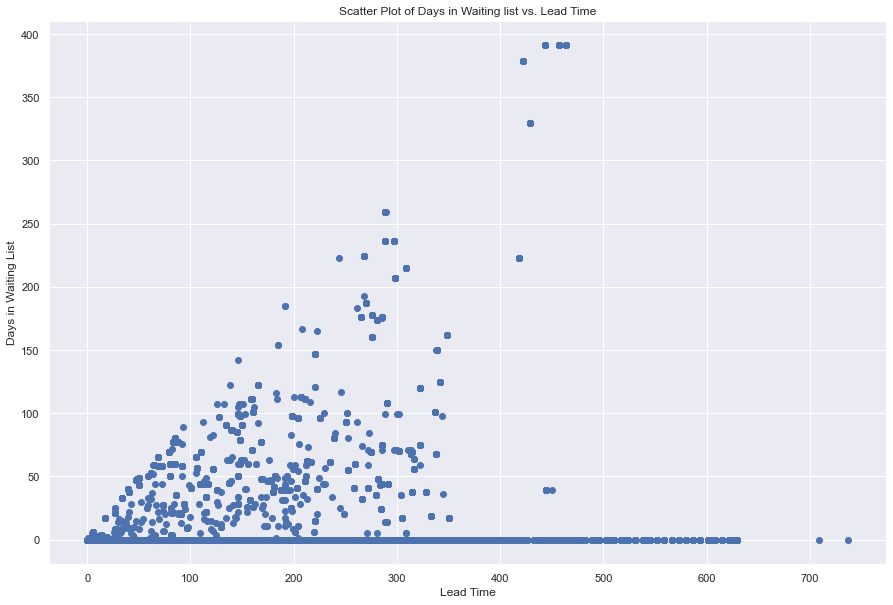

In [24]:
plt.scatter(y=booking['days_in_waiting_list'],x=booking['lead_time'])
plt.title('Scatter Plot of Days in Waiting list vs. Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Days in Waiting List')
plt.show()
# To see if a longer lead time results in a longer wait time

### Missing Data

In [21]:
def missing_values_table(booking):
        # Total missing values
        mis_val = booking.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * booking.isnull().sum() / len(booking)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(booking.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [22]:
missing=missing_values_table(booking)
missing

Your selected dataframe has 32 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
company,112593,94.3
agent,16340,13.7
country,488,0.4
children,4,0.0
